<center><h1> Heart Disease Prediction </h1></center>

### We are going to use the following attributes to predict:

1. age
2. sex - category
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2) 
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect



In [2]:
import numpy as np 
import pandas as pd

In [3]:
data=pd.read_csv('heart.csv')

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [9]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [12]:
#converting data types 
for x in ["cp","sex","fbs","exng","restecg","slp","caa","thall"]:
    data[x]=data[x].astype("category")

In [14]:
data.dtypes

age            int64
sex         category
cp          category
trtbps         int64
chol           int64
fbs         category
restecg     category
thalachh       int64
exng        category
oldpeak      float64
slp         category
caa         category
thall       category
output         int64
dtype: object

In [15]:
data.describe()

,age,trtbps,chol,thalachh,oldpeak,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


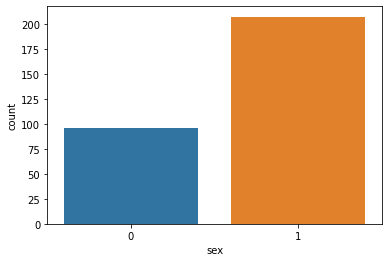

In [16]:
import seaborn as sns
sns.countplot(data.sex)

In [35]:
data_1=data.groupby("cp").sum().reset_index()

In [40]:
import matplotlib.pyplot as plt

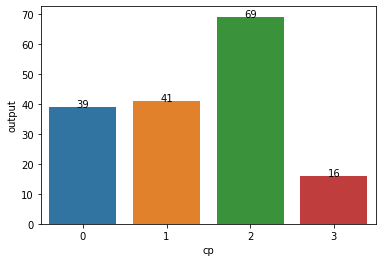

In [44]:
cp_output=sns.barplot(data=data_1,x="cp",y="output")
for index, row in data_1.iterrows():
    cp_output.text(row.cp,row.output, round(row.output,2), color='black', ha="center")

plt.show()

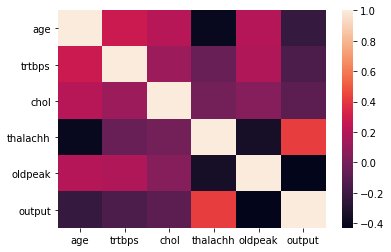

In [45]:
sns.heatmap(data.corr())


In [46]:
X=data.iloc[:,:-1]

y=data.output

In [47]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [52]:
print(X_train.shape,X_test.shape)


(212, 13) (91, 13)


In [53]:
#splitting the data into numerical and categorical data types so that we can either standardise or dummify

X_train_num=X_train.select_dtypes(include=["int64","float64"])
X_test_num=X_test.select_dtypes(include=["int64","float64"])
X_train_cat=X_train.select_dtypes(include=["category"])
X_test_cat=X_test.select_dtypes(include=["category"])
print(X_train_num.columns,X_train_cat.columns)

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'], dtype='object') Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], dtype='object')


In [54]:
#standardising numerical variables 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num_stan=pd.DataFrame(scaler.transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_test_num_stan=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)
X_test_num_stan

,age,trtbps,chol,thalachh,oldpeak
231,0.293855,1.833836,0.859981,-1.217513,-0.045983
46,-1.121992,0.468762,-0.168224,1.295844,-0.901096
2,-1.448726,-0.077268,-0.758490,0.936793,0.296063
272,1.382969,-0.623298,-0.130142,-3.596225,-0.045983
243,0.293855,1.123997,0.574369,-2.833242,0.125040
...,...,...,...,...,...
177,1.056235,0.468762,1.735860,0.308454,-0.901096
185,-1.121992,-1.060122,0.879022,0.084047,-0.901096
47,-0.795258,0.359556,0.250674,0.218691,-0.901096
127,1.382969,1.123997,0.631491,0.936793,-0.901096


In [55]:
# dummifying Categorical Variables

X_train_cat_dum=pd.get_dummies(X_train_cat)
X_test_cat_dum=pd.get_dummies(X_test_cat)

In [56]:
X_train_cat_dum

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
163,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
260,1,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
124,1,0,0,0,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
110,1,0,1,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
13,0,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0,1,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
31,0,1,1,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
40,1,0,0,0,1,0,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0
230,0,1,0,0,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


In [57]:
# Merging the numerical and categorical dataframes

X_train_final=pd.concat([X_train_num_stan,X_train_cat_dum],axis=1)
X_test_final=pd.concat([X_test_num_stan,X_test_cat_dum],axis=1)

In [58]:
X_train_final

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
163,-1.775460,0.359556,-1.310674,0.981674,-0.901096,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
260,1.274057,2.543675,-0.301510,0.622623,-0.045983,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
124,-1.666549,-2.042976,-0.853694,1.250962,-0.901096,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
110,1.056235,2.652881,1.545451,0.128928,-0.901096,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
13,1.056235,-1.169328,-0.625204,-0.319886,0.638108,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.620589,0.468762,0.936145,0.847030,0.125040,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
31,1.165146,-0.623298,-1.272593,-0.499411,-0.559050,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
40,-0.359613,0.468762,1.221757,-0.409648,0.381574,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
230,-0.795258,-1.278534,-0.015897,0.039165,-0.901096,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


In [59]:
# We will build a Regression model using statsmodels API, this gives us a deep description into the model, the fit,
# the residual information, etc. However, Since this is a very old library, it has some restrictions

import statsmodels.api as sm

#defining the model 
lr=sm.Logit(y_train,X_train_final).fit()

#let's look at the summary

print(lr.summary())

         Current function value: 0.303221
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  212
Model:                          Logit   Df Residuals:                      189
Method:                           MLE   Df Model:                           22
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                  0.5585
Time:                        20:00:31   Log-Likelihood:                -64.283
converged:                      False   LL-Null:                       -145.59
Covariance Type:            nonrobust   LLR p-value:                 1.941e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.4491      0.292      1.538      0.124      -0.123       1.022
trtbps        -0.6329      0.252     -2.510      0.012      -1.12

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\dell\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [60]:
# Getting the predictions from the training dataset 
train_predictions=lr.predict(X_train_final)

In [61]:
train_predictions

163    1.000000
260    0.013632
124    0.998824
110    0.755893
13     0.868846
         ...   
237    0.005567
31     0.709351
40     0.882940
230    0.986798
83     0.723370
Length: 212, dtype: float64

In [67]:
# Compute ROC curve and ROC area for each class

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_train, train_predictions)
roc_auc = auc(fpr, tpr)


In [68]:
roc_auc

0.9431121529029931

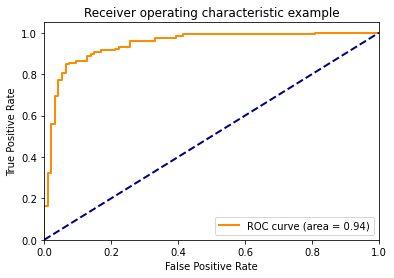

In [69]:
#plotting the roc curve 

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [79]:
# Getting the test predictions 

test_predictions=lr.predict(X_test_final)


In [80]:
test_predictions=[0 if x<0.2 else 1 for x in test_predictions]

In [81]:
# Now lets get the metrics

#classification Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Accuracy for Test set:")
print(accuracy_score(y_test,test_predictions))

print("Recall for Test set:")
print(recall_score(y_test,test_predictions,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,test_predictions,pos_label=1))

Accuracy for Test set:
0.8021978021978022
Recall for Test set:
0.9574468085106383
Precision for Test set:
0.7377049180327869
